## The goal of this notebook is to apply Brian Burke's regression analysis on evaluating quarterbacks using a new passer rating system to the 2023/24 NFL season, compare it to the NFL's passer rating system and analyze the differences

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('~/qbs.csv')

In [3]:
data

,Rk,Player,Age,Team,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Awards
0,1,Tua Tagovailoa,25,MIA,QB,17,17,11-6-0,388,560,...,101.1,60.8,29,171,4.92,7.56,7.48,2,2,PBAP CPoY-5
1,2,Jared Goff,29,DET,QB,17,17,12-5-0,407,605,...,97.9,60.3,30,197,4.72,6.89,6.99,2,3,NaN
2,3,Dak Prescott,30,DAL,QB,17,17,12-5-0,410,590,...,105.9,72.7,39,255,6.20,6.77,7.28,2,3,PBAP-2AP MVP-2AP OPoY-5
3,4,Josh Allen,27,BUF,QB,17,17,11-6-0,385,579,...,92.2,69.6,24,152,3.98,6.89,6.51,2,4,AP MVP-5AP OPoY-6
4,5,Brock Purdy,24,SFO,QB,16,16,12-4-0,308,444,...,113.0,72.8,28,153,5.93,8.74,9.01,0,0,PBAP MVP-4AP OPoY-6AP CPoY-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,Deebo Samuel,27,SFO,WR,15,15,NaN,0,1,...,39.6,4.8,0,0,0.00,0.00,0.00,0,0,NaN
113,114,Chris Godwin,27,TAM,WR,17,17,NaN,0,1,...,39.6,0.8,0,0,0.00,0.00,0.00,0,0,NaN
114,115,Kyle Trask,25,TAM,QB,2,0,NaN,0,1,...,39.6,1.2,0,0,0.00,0.00,0.00,0,0,NaN
115,116,Christian Kirk,27,JAX,WR,12,12,NaN,1,2,...,56.2,3.1,0,0,0.00,-0.50,-0.50,0,0,NaN


### Rating = 1.543 * passing yards per play - 50.0957 * interceptions per passing attempt

This is from the book 'Mathletics', chapter 19 titled "Who's better, Tom Brady or Peyton Manning?" on evaluating Quarterbacks according to Brian Burke's regression analysis on quarterback data from the 2002-2006 NFL seasons

In [4]:
data.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Awards'],
      dtype='object')

In [11]:
data['Rating_Burke'] = (1.543 * (data['Yds'] - data['Yds.1']) / data['Att']) - (0.5 * (data['Int%']))

In [12]:
(data['Yds'] - data['Yds.1']) / data['Att']

0      7.951786
1      7.236364
2      7.222034
3      7.174439
4      9.295045
         ...   
112    0.000000
113    0.000000
114    0.000000
115   -0.500000
116   -7.000000
Length: 117, dtype: float64

In [13]:
data['Rating_Burke']

0      11.019605
1      10.165709
2      10.393598
3       9.520159
4      13.092255
         ...    
112     0.000000
113     0.000000
114     0.000000
115    -0.771500
116   -10.801000
Name: Rating_Burke, Length: 117, dtype: float64

In [14]:
data.sort_values(by='Rating_Burke', ascending=False)

,Rk,Player,Age,Team,Pos,G,GS,QBrec,Cmp,Att,...,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Awards,Rating_Burke
76,77,Sean Clifford,25,GNB,QB,2,0,NaN,1,1,...,100.0,0,0,0.0,37.0,37.0,0,0,NaN,57.0910
77,78,Jalen Reeves-Maybin,28,DET,LB,17,0,NaN,1,1,...,NaN,0,0,0.0,31.0,31.0,0,0,PBAP-2,47.8330
78,79,Braden Mann,26,PHI,P,15,0,NaN,1,1,...,NaN,0,0,0.0,28.0,28.0,0,0,NaN,43.2040
75,76,Keenan Allen,31,LAC,WR,13,13,NaN,1,2,...,98.8,0,0,0.0,24.5,34.5,0,0,PB,37.8035
80,81,Drake London,22,ATL,WR,16,16,NaN,1,1,...,99.9,0,0,0.0,22.0,22.0,0,0,NaN,33.9460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,Cam Akers,24,MIN,RB,6,0,NaN,0,0,...,NaN,1,7,100.0,-7.0,-7.0,0,0,NaN,NaN
104,105,Malik Cunningham,25,NWE,QB,1,0,NaN,0,0,...,NaN,1,5,100.0,-5.0,-5.0,0,0,NaN,NaN
105,106,Parris Campbell,26,NYG,WR,12,3,NaN,0,0,...,0.0,1,8,100.0,-8.0,-8.0,0,0,NaN,NaN
110,111,Josh Jacobs,25,LVR,RB,13,13,NaN,0,0,...,0.2,1,4,100.0,-4.0,-4.0,0,0,NaN,NaN


In [51]:
# Let's take out non-QBs and players who started 10 or fewer games
data = data[data['Pos'] == 'QB']
data = data[data['GS'] > 10]

In [52]:
sorted_burke = data.sort_values(by='Rating_Burke', ascending=False)

In [53]:
sorted_nfl = data.sort_values(by='Rate', ascending=False)

In [54]:
sorted_nfl.head(10)

,Rk,Player,Age,Team,Pos,G,GS,QBrec,Cmp,Att,...,Awards,Rating_Burke,Column1_normalized,Column2_normalized,Difference,Rate_normalized,Rating_Burke_normalized,Rate_rank,Rating_Burke_rank,Rank difference
4,5,Brock Purdy,24,SFO,QB,16,16,12-4-0,308,444,...,PBAP MVP-4AP OPoY-6AP CPoY-6,13.092255,2.264252,2.621195,0.356943,2.264252,2.621195,1.0,1.0,0.0
2,3,Dak Prescott,30,DAL,QB,17,17,12-5-0,410,590,...,PBAP-2AP MVP-2AP OPoY-5,10.393598,1.528370,0.808583,0.719788,1.528370,0.808583,2.0,5.0,3.0
14,15,Lamar Jackson,26,BAL,QB,16,16,13-3-0,307,457,...,PBAP-1AP MVP-1AP OPoY-4AP CPoY-9,10.932232,1.196705,1.170368,0.026337,1.196705,1.170368,3.0,4.0,1.0
0,1,Tua Tagovailoa,25,MIA,QB,17,17,11-6-0,388,560,...,PBAP CPoY-5,11.019605,1.030873,1.229054,0.198182,1.030873,1.229054,4.0,3.0,-1.0
7,8,C.J. Stroud,22,HOU,QB,15,15,9-6-0,319,499,...,PBAP MVP-8AP ORoY-1,11.179180,0.999779,1.336236,0.336457,0.999779,1.336236,5.0,2.0,-3.0
18,19,Russell Wilson,35,DEN,QB,15,15,7-8-0,297,447,...,NaN,8.806747,0.709572,-0.257261,0.966833,0.709572,-0.257261,6.0,19.0,13.0
1,2,Jared Goff,29,DET,QB,17,17,12-5-0,407,605,...,NaN,10.165709,0.699208,0.655516,0.043692,0.699208,0.655516,7.0,6.0,-1.0
12,13,Derek Carr,32,NOR,QB,17,17,9-8-0,375,548,...,NaN,9.555438,0.678478,0.245614,0.432865,0.678478,0.245614,8.0,9.0,1.0
6,7,Jordan Love,25,GNB,QB,17,17,9-8-0,372,579,...,NaN,9.488568,0.512646,0.200699,0.311947,0.512646,0.200699,9.0,12.0,3.0
8,9,Baker Mayfield,28,TAM,QB,17,17,9-8-0,364,566,...,PBAP CPoY-3,9.492078,0.357178,0.203057,0.154121,0.357178,0.203057,10.0,11.0,1.0


In [55]:
sorted_burke.head(10)

,Rk,Player,Age,Team,Pos,G,GS,QBrec,Cmp,Att,...,Awards,Rating_Burke,Column1_normalized,Column2_normalized,Difference,Rate_normalized,Rating_Burke_normalized,Rate_rank,Rating_Burke_rank,Rank difference
4,5,Brock Purdy,24,SFO,QB,16,16,12-4-0,308,444,...,PBAP MVP-4AP OPoY-6AP CPoY-6,13.092255,2.264252,2.621195,0.356943,2.264252,2.621195,1.0,1.0,0.0
7,8,C.J. Stroud,22,HOU,QB,15,15,9-6-0,319,499,...,PBAP MVP-8AP ORoY-1,11.179180,0.999779,1.336236,0.336457,0.999779,1.336236,5.0,2.0,-3.0
0,1,Tua Tagovailoa,25,MIA,QB,17,17,11-6-0,388,560,...,PBAP CPoY-5,11.019605,1.030873,1.229054,0.198182,1.030873,1.229054,4.0,3.0,-1.0
14,15,Lamar Jackson,26,BAL,QB,16,16,13-3-0,307,457,...,PBAP-1AP MVP-1AP OPoY-4AP CPoY-9,10.932232,1.196705,1.170368,0.026337,1.196705,1.170368,3.0,4.0,1.0
2,3,Dak Prescott,30,DAL,QB,17,17,12-5-0,410,590,...,PBAP-2AP MVP-2AP OPoY-5,10.393598,1.528370,0.808583,0.719788,1.528370,0.808583,2.0,5.0,3.0
1,2,Jared Goff,29,DET,QB,17,17,12-5-0,407,605,...,NaN,10.165709,0.699208,0.655516,0.043692,0.699208,0.655516,7.0,6.0,-1.0
10,11,Matthew Stafford,35,LAR,QB,15,15,9-6-0,326,521,...,PBAP MVP-8AP CPoY-4,10.085662,0.139523,0.601751,0.462228,0.139523,0.601751,13.0,7.0,-6.0
15,16,Geno Smith,33,SEA,QB,15,15,8-7-0,323,499,...,PB,9.591782,0.098064,0.270025,0.171960,0.098064,0.270025,15.0,8.0,-7.0
12,13,Derek Carr,32,NOR,QB,17,17,9-8-0,375,548,...,NaN,9.555438,0.678478,0.245614,0.432865,0.678478,0.245614,8.0,9.0,1.0
3,4,Josh Allen,27,BUF,QB,17,17,11-6-0,385,579,...,AP MVP-5AP OPoY-6,9.520159,0.108429,0.221918,0.113489,0.108429,0.221918,14.0,10.0,-4.0


### Let's evaluate the correlation between Burke's rating system and the NFL's passer rating system

In [69]:
print(data['Rating_Burke'].corr(data['Rate']))

0.9319288763515517


### There's a 93% correlation between the two evaluation metrics!

### Now let's try to identify the players that had the largest differences in ratings between the two systems

In [68]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [58]:
df = data

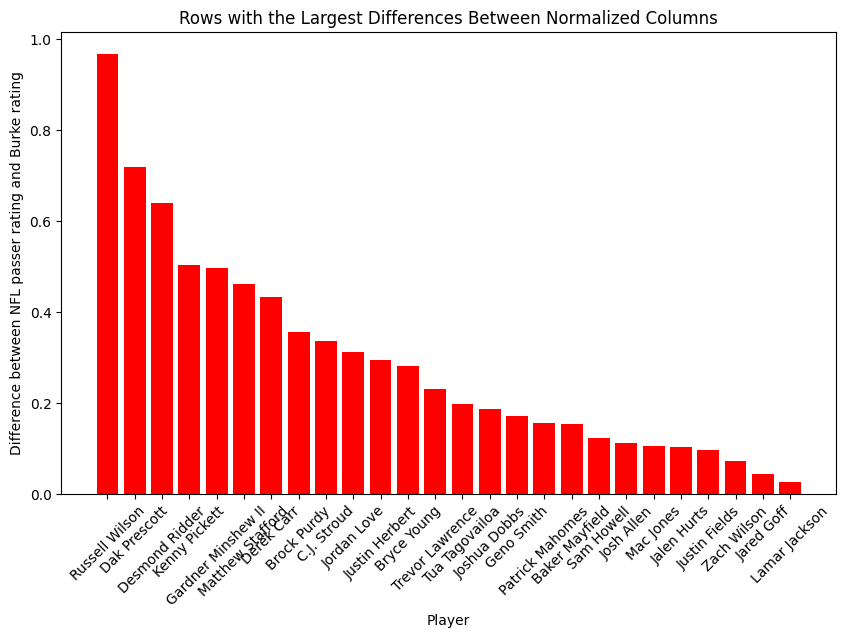

In [59]:
scaler = StandardScaler()
df[['Rate_normalized', 'Rating_Burke_normalized']] = scaler.fit_transform(df[['Rate', 'Rating_Burke']])

df['Difference'] = abs(df['Rate_normalized'] - df['Rating_Burke_normalized'])

df_sorted = df.sort_values(by='Difference', ascending=False)

df_sorted = df_sorted

colors = ['red' if diff > 0 else 'blue' for diff in df_sorted['Difference']]

# Visualize the rows with the largest differences
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Player'], df_sorted['Difference'], color='red')
plt.xticks(rotation=45)
plt.xlabel('Player')
plt.ylabel('Difference between NFL passer rating and Burke rating')
plt.title('Rows with the Largest Differences Between Normalized Columns')
plt.show()

##### Wow, Russell Wilson stands out as an outlier. let's analyze this further by including an important metric, Sack percentage

In [70]:
df_sorted[['Player', 'Sk', 'Yds.1', 'Sk%']]

,Player,Sk,Yds.1,Sk%
18,Russell Wilson,45,258,9.15
2,Dak Prescott,39,255,6.20
20,Desmond Ridder,31,197,7.40
27,Kenny Pickett,23,173,6.63
16,Gardner Minshew II,34,187,6.49
10,Matthew Stafford,30,205,5.44
12,Derek Carr,31,218,5.35
4,Brock Purdy,28,153,5.93
7,C.J. Stroud,38,331,7.08
6,Jordan Love,30,242,4.93


In [71]:
data['Rate_rank'] = data['Rate'].rank(ascending=False)

data['Rating_Burke_rank'] = data['Rating_Burke'].rank(ascending=False)

data['Rank difference'] = data['Rating_Burke_rank'] - data['Rate_rank']

In [72]:
rank_diffs = data[['Player', 'Rate_rank', 'Rating_Burke_rank', 'Rank difference', 'Sk%']]
rank_diffs = rank_diffs.sort_values(by='Rank difference', ascending = False)

In [73]:
rank_diffs

,Player,Rate_rank,Rating_Burke_rank,Rank difference,Sk%
18,Russell Wilson,6.0,19.0,13.0,9.15
17,Justin Herbert,11.0,15.0,4.0,5.98
33,Joshua Dobbs,22.0,25.0,3.0,6.71
2,Dak Prescott,2.0,5.0,3.0,6.20
21,Justin Fields,18.0,21.0,3.0,10.63
6,Jordan Love,9.0,12.0,3.0,4.93
12,Derek Carr,8.0,9.0,1.0,5.35
5,Patrick Mahomes,12.0,13.0,1.0,4.33
8,Baker Mayfield,10.0,11.0,1.0,6.60
14,Lamar Jackson,3.0,4.0,1.0,7.49


As you can see, Russell Wilson, despite being ranked very highly according to the NFL's passer rating system, drops downby 13 spots according to the Burke rating system, primarily because the NFL's passer rating system does not penalize players for sacks taken, and Russell Wilson had a high sack rate of 9.15%. On the other end of the spectrum, players like Josh Allen, Matt Stafford and Geno Smith who had relatively low sack percentages get a significant boost with the Burke rating system